In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, Dense, Input, GlobalMaxPooling2D
from tensorflow.keras.models import Model
import tensorflow as tf

In [2]:
cifar10= tf.keras.datasets.cifar10

In [7]:
(x_train, y_train), (x_test, y_test)= cifar10.load_data()

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [22]:
y_train #the output array in the cifar10 data is two dimensional, CNNs expect 1D arrays as output, hence we flatten the array

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [23]:
y_train.flatten()

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [24]:
x_train, x_test= x_train/ 255.0, x_test/ 255.0 #Normalization
y_train, y_test= y_train.flatten(), y_test.flatten() #flattening

In [25]:
y_train.shape

(50000,)

In [26]:
outputLayer = set(y_test)

In [27]:
outputLayer #Categories/classes in the output layers

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [31]:
#building the model, keras functional API
inpt = Input(shape=x_train[0].shape) #input layer of the CNN
nn = Conv2D(32, (3,3), strides = 2, activation='relu') (inpt) #first conv layer
nn = Conv2D(64, (3,3), strides = 2, activation='relu') (nn) #second conv layer
nn = Conv2D(128, (3,3), strides = 2, activation='relu') (nn) #third conv layer, stride is the number of pixels to skip when
                                                            #executing convolution
                                                            #as conventions, we choose small filters relatively to the image
                                                            #size and an increasing number of feature maps per conv
nn = Flatten() (nn) #we flatten the output, which is going to be something like 4 x 4 x 50000, turned to 50000, (50000 x 1)
nn = Dropout(0.2) (nn) #regularization 1
nn = Dense(512, activation='relu') (nn) #dense layer
nn = Dropout(0.2) (nn) #regularization 2
nn = Dense(len(outputLayer), activation='softmax') (nn) #output layer, softmax activation for mutliple classification

model = Model(inpt, nn)

In [32]:
#compiling and fitting
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
r= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs= 15)

Epoch 1/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5277 - accuracy: 0.4443 - val_loss: 1.2539 - val_accuracy: 0.5427
Epoch 2/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2008 - accuracy: 0.5710 - val_loss: 1.0600 - val_accuracy: 0.6238
Epoch 3/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0483 - accuracy: 0.6294 - val_loss: 1.0045 - val_accuracy: 0.6397
Epoch 4/15
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9343 - accuracy: 0.6690 - val_loss: 0.9583 - val_accuracy: 0.6621
Epoch 5/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8501 - accuracy: 0.6995 - val_loss: 0.9071 - val_accuracy: 0.6805
Epoch 6/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7689 - accuracy: 0.7278 - val_loss: 0.9242 - val_accuracy: 0.6734
Epoch 7/15
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7062 - accuracy: 0.7506 - val_loss: 0.8760 - val_ac

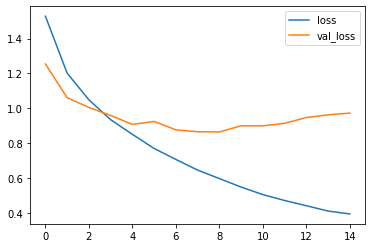

In [33]:
#plotting loss per epch
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()

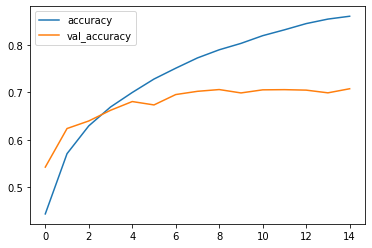

In [34]:
#plotting accuracy per epoch
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

Confusion Matrix, no normalization
[[755  18  58  20  18  14  10  12  56  39]
 [ 12 838  14   9   2   6   5   3  25  86]
 [ 53   8 618  67  74  75  57  25  12  11]
 [ 21  10  74 469  72 200  84  40  13  17]
 [ 19   5  79  58 679  37  47  61  10   5]
 [ 10   9  60 160  65 627  24  37   3   5]
 [  9  11  34  49  48  33 797   6  10   3]
 [ 13   0  41  33  91  79   7 717   3  16]
 [ 60  35  17  16  10   8   8   3 811  32]
 [ 40 101  12  16   8  15  13  15  17 763]]


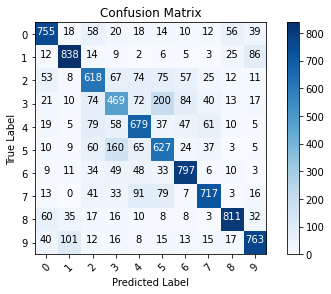

In [37]:
#plotting confusion matrix

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, no normalization")
    print(cm)
    plt.imshow(cm, interpolation= 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(outputLayer))
    plt.xticks(tick_marks, outputLayer, rotation= 45)
    plt.yticks(tick_marks, outputLayer)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment= "center", color= "white" if cm[i, j]> thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

prediction_test= model.predict(x_test).argmax(axis= 1)
cm= confusion_matrix(y_test, prediction_test)
plot_confusion_matrix(cm, list(range(10)))

In [44]:
#Label Mapping
labels= """Airplace
Atomobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck
""".split()

In [45]:
miscalssifiedPredictions= np.where(prediction_test!= y_test)[0]

Text(0.5, 1.0, 'True Label: Bird, Predicted Label: Ship')

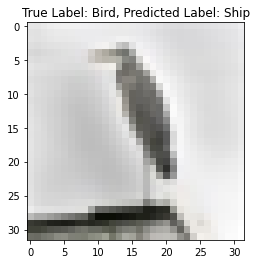

In [47]:
randomPrediction= np.random.choice(miscalssifiedPredictions)
plt.imshow(x_test[randomPrediction], cmap= 'gray')
plt.title(f"True Label: {labels[y_test[randomPrediction]]}, Predicted Label: {labels[prediction_test[randomPrediction]]}")